In [1]:
import os

os.chdir(os.path.dirname(os.getcwd()))

In [2]:
import datetime
import libs.local
import matplotlib.pyplot
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import xarray

In [3]:
experiment = 'ssp585'
key = 'Ensemble mean'
months = ['MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG']
region = 'Arctic_Ocean'

kwargs = {
    'experiment': experiment,
    'region': region,
    'suffix': '_delta_1980-2010'
}
siconc = libs.local.get_ensemble_series('siconc', **kwargs)[key] / 1e6
sithick = libs.local.get_ensemble_series('sithick', **kwargs)[key]
sisnthick = libs.local.get_ensemble_series('sisnthick', **kwargs)[key]
simpconc = libs.local.get_ensemble_series('simpconc_area', **kwargs)[key]
tas = libs.local.get_ensemble_series('tas_siconc', **kwargs)[key]
prra = libs.local.get_ensemble_series('prra_siconc', **kwargs)[key]
prsn = libs.local.get_ensemble_series('prsn_siconc', **kwargs)[key]


def filter_month_plot(time, siconc, sithick, sisnthick, simpconc, tas, prra, prsn, title=''):
    period = datetime.datetime.strptime(time, '%b').month

    siconc = siconc.where(siconc.time['time.month'] == period)
    sithick = sithick.where(sithick.time['time.month'] == period)
    sisnthick = sisnthick.where(sisnthick.time['time.month'] == period)
    simpconc = simpconc.where(simpconc.time['time.month'] == period)
    tas = tas.where(tas.time['time.month'] == period)
    prra = prra.where(prra.time['time.month'] == period)
    prsn = prsn.where(prsn.time['time.month'] == period)
    
    plot(siconc, sithick, sisnthick, simpconc, tas, prra, prsn, title)

    
def plot(siconc, sithick, sisnthick, simpconc, tas, prra, prsn, title=''):
    fig, axs = matplotlib.pyplot.subplots(1, 6, figsize=(15, 3))
    axs = axs.flatten()
    axs[0].scatter(simpconc, tas); axs[0].set_xlabel('simpconc'); axs[0].set_ylabel('tas')
    axs[1].scatter(simpconc, prsn); axs[1].set_xlabel('simpconc'); axs[1].set_ylabel('prsn')
    axs[2].scatter(simpconc, prra); axs[2].set_xlabel('simpconc'); axs[2].set_ylabel('prra')
    axs[3].scatter(simpconc, siconc); axs[3].set_xlabel('simpconc'); axs[3].set_ylabel('siarea')
    axs[4].scatter(simpconc, sithick); axs[4].set_xlabel('simpconc'); axs[4].set_ylabel('sithick')
    axs[5].scatter(simpconc, sisnthick); axs[5].set_xlabel('simpconc'); axs[5].set_ylabel('sisnthick')

    fig.suptitle(title)
    fig.tight_layout()

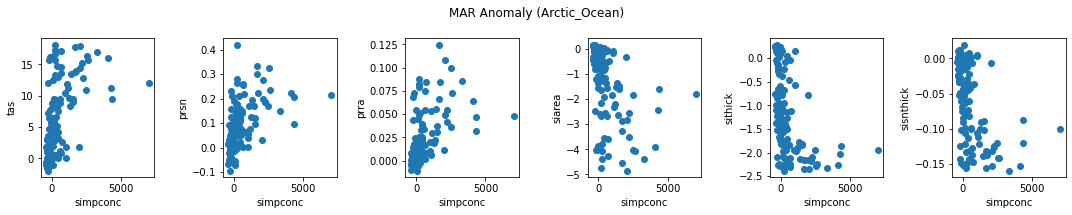

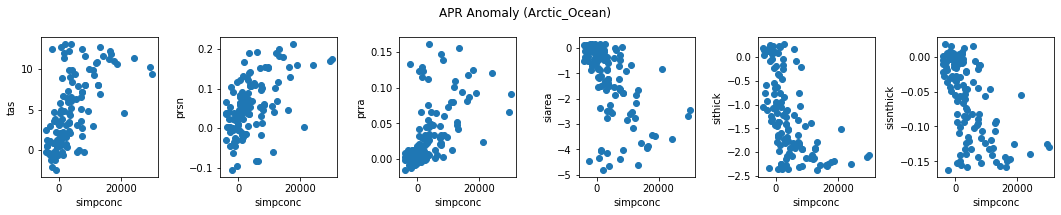

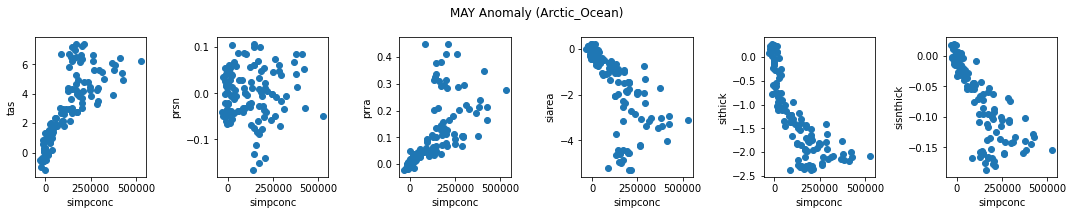

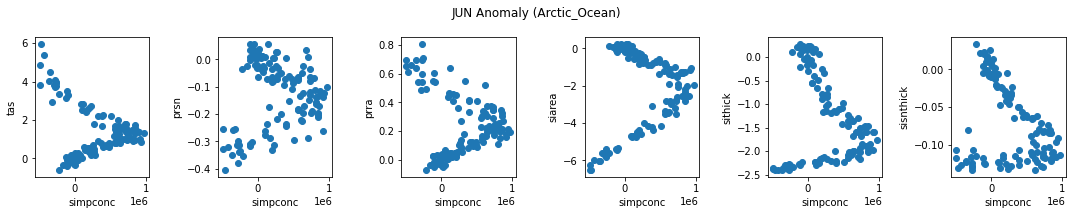

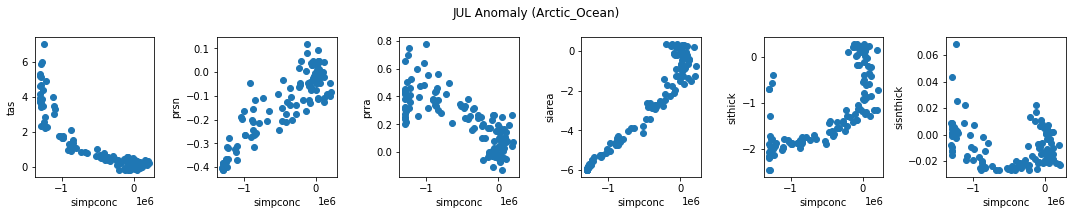

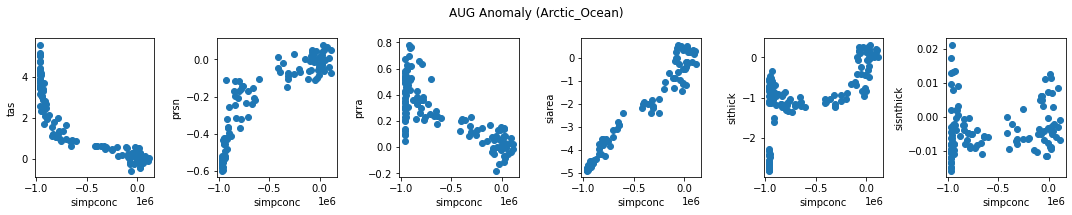

In [4]:
[filter_month_plot(
    m, siconc, sithick, sisnthick, simpconc, tas, prra, prsn, title=f'{m} Anomaly ({region})'
) for m in months];

In [5]:
def preprocess(data, period):
    return data.where(data.time['time.month'] == period)


# Apr
month = 4
data = pd.DataFrame({
    'siconc': preprocess(siconc, month).data,
    'simpconc': preprocess(simpconc, month).data,
    'tas': preprocess(tas, month).data,
    'prra': preprocess(prra, month).data,
    'prsn': preprocess(prsn, month).data,
})
# sns.heatmap(data.corr(), cmap='RdBu_r', annot=True)

model = smf.ols(formula="simpconc ~ prra + tas", data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               simpconc   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.336
Method:                 Least Squares   F-statistic:                     31.42
Date:                Fri, 17 Jun 2022   Prob (F-statistic):           1.15e-11
Time:                        13:16:30   Log-Likelihood:                -1210.6
No. Observations:                 121   AIC:                             2427.
Df Residuals:                     118   BIC:                             2436.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -254.5676    785.701     -0.324      0.747   -1810.469    1301.334
prra       -4230.9650   3.24e+04     -0.130      0.896   -6.84e+04       6e+04
tas          949.0095    322.550      2.942      0.004     310.273    1587.746
==============================================================================
Omnibus:                       38.527   Durbin-Watson:                   1.355
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               94.230
Skew:                           1.232   Prob(JB):                     3.45e-21
Kurtosis:                       6.552   Cond. No.                         426.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
# May
month = 5
data = pd.DataFrame({
    'siconc': preprocess(siconc, month).data,
    'simpconc': preprocess(simpconc, month).data,
    'tas': preprocess(tas, month).data,
    'prra': preprocess(prra, month).data,
    'prsn': preprocess(prsn, month).data,
})
# sns.heatmap(data.corr(), cmap='RdBu_r', annot=True)

model = smf.ols(formula="simpconc ~ prra + tas", data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               simpconc   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     114.3
Date:                Fri, 17 Jun 2022   Prob (F-statistic):           2.50e-28
Time:                        13:16:30   Log-Likelihood:                -1524.3
No. Observations:                 121   AIC:                             3055.
Df Residuals:                     118   BIC:                             3063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -8995.8678   1.11e+04     -0.810      0.420    -3.1e+04     1.3e+04
prra       -4.921e+05    1.4e+05     -3.518      0.001   -7.69e+05   -2.15e+05
tas         6.294e+04   6958.448      9.045      0.000    4.92e+04    7.67e+04
==============================================================================
Omnibus:                       28.850   Durbin-Watson:                   1.336
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.185
Skew:                           1.101   Prob(JB):                     5.67e-11
Kurtosis:                       5.124   Cond. No.                         81.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
def preprocess(data, period):
    return data.where(data.time['time.month'] == period)


# June
month = 6
data = pd.DataFrame({
    'siconc': preprocess(siconc, month).data,
    'simpconc': preprocess(simpconc, month).data,
    'tas': preprocess(tas, month).data,
    'prra': preprocess(prra, month).data,
    'prsn': preprocess(prsn, month).data,
})
# sns.heatmap(data.corr(), cmap='RdBu_r', annot=True)

model = smf.ols(formula="simpconc ~ prra + tas", data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               simpconc   R-squared:                       0.170
Model:                            OLS   Adj. R-squared:                  0.156
Method:                 Least Squares   F-statistic:                     12.06
Date:                Fri, 17 Jun 2022   Prob (F-statistic):           1.72e-05
Time:                        13:16:30   Log-Likelihood:                -1716.6
No. Observations:                 121   AIC:                             3439.
Df Residuals:                     118   BIC:                             3448.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.311e+05   4.72e+04      7.017      0.000    2.38e+05    4.25e+05
prra        1.727e+06   4.67e+05      3.699      0.000    8.02e+05    2.65e+06
tas        -3.405e+05   7.51e+04     -4.533      0.000   -4.89e+05   -1.92e+05
==============================================================================
Omnibus:                       12.176   Durbin-Watson:                   0.363
Prob(Omnibus):                  0.002   Jarque-Bera (JB):                4.429
Skew:                           0.123   Prob(JB):                        0.109
Kurtosis:                       2.096   Cond. No.                         30.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""